In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_csv('COVID-19.csv', sep=';')
# df.head()

df = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx')
df.head(3)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-13,13,4,2020,52,0,Afghanistan,AF,AFG,37172386.0
1,2020-04-12,12,4,2020,34,3,Afghanistan,AF,AFG,37172386.0
2,2020-04-11,11,4,2020,37,0,Afghanistan,AF,AFG,37172386.0


In [3]:
df[df['countriesAndTerritories']=='Spain']['cases'].sum()

166019

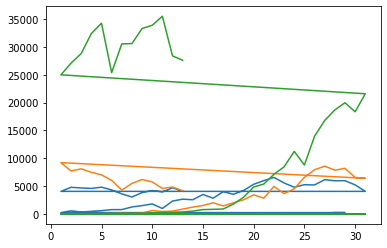

In [4]:
IT = df[(df['countriesAndTerritories']=='Italy')]
IT.set_index('day', inplace=True)
EEUU = df[(df['countriesAndTerritories']=='United_States_of_America')]
EEUU.set_index('day', inplace=True)
ESP = df[(df['countriesAndTerritories']=='Spain')]
ESP.set_index('day', inplace=True)

plt.plot(IT['cases'])
plt.plot(ESP['cases'])
plt.plot(EEUU['cases'])
plt.show()

In [5]:
df[df['countriesAndTerritories']=='Colombia']['cases'].sum()

2776

In [6]:
df['deaths'].sum()

113513

In [7]:
df['cases'].sum()

1807308

## Top 10

In [8]:
TC = pd.DataFrame(columns=['Country','Total Cases','Total Deaths'])
pays = list(df['countriesAndTerritories'].unique())

for p in pays:
    tmp = df[df['countriesAndTerritories']==p]['cases'].sum()
    tmp2 = df[df['countriesAndTerritories']==p]['deaths'].sum()
    TC = TC.append({'Country' : p , 
                    'Total Cases' : int(tmp),
                    'Total Deaths': int(tmp2)},
                   
                   ignore_index=True)

TC.sort_values(by='Total Cases', ascending=False, axis=0, inplace=True)
TOP10 = TC.head(10)
TOP10.set_index('Country', inplace=True)
TOP10

,Total Cases,Total Deaths
Country,,
United_States_of_America,557571,22108
Spain,166019,16972
Italy,156363,19901
Germany,123016,2799
France,95403,14393
United_Kingdom,84279,10612
China,83209,3345
Iran,71686,4474
Turkey,56956,1198


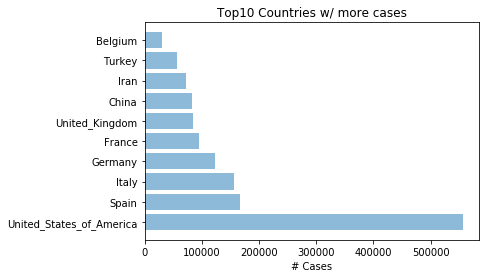

In [9]:
country_ = TOP10.index.values # ('China', 'Italy', 'Iran', 'Spain', 'United_States_of_America', 'France', 'South_Korea', 'Germany', 'Switzerland', 'United_Kingdom')
cases = list(TOP10['Total Cases']) # [81238, 35713, 17361, 13716, 9415, 9134, 8565, 8198, 3010, 2630]
y_pos = np.arange(len(country_)) # array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.barh(y_pos, cases, align='center', alpha=0.5)
plt.yticks(y_pos, country_)
plt.xlabel('# Cases')
plt.title('Top10 Countries w/ more cases')
plt.show()

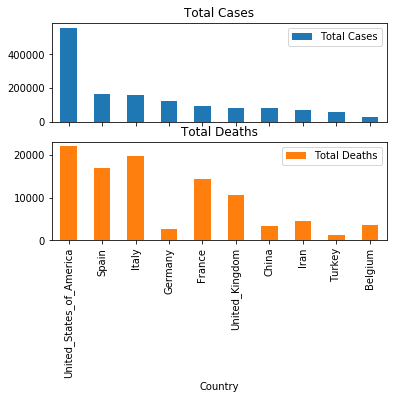

In [10]:
axesA = TOP10.plot.bar(rot=90, subplots=True)
# axesA[1].legend(loc=1)
plt.show()

## Paises centro y latinoamericano

In [11]:
LAT = pd.DataFrame()

paises_suramericanos = ['Mexico', 'Guatemala', 'Honduras', 'El_Salvador', 'Nicaragua',
                        'Costa_Rica', 'Panama', 'Colombia', 'Venezuela', 'Ecuador',
                        'Peru', 'Bolivia', 'Chile', 'Paraguay','Brazil',
                        'Argentina', 'Uruguay', 'Cuba', 'Dominican_Republic', 'Guyana',
                         'Suriname','Haiti']

for p in paises_suramericanos:
    tmp = df[df['countriesAndTerritories']==p]['cases'].sum()
    tmp2 = df[df['countriesAndTerritories']==p]['deaths'].sum()
    LAT = LAT.append({'Country' : p , 
                    'Total Cases' : int(tmp),
                    'Total Deaths': int(tmp2)},
                   
                   ignore_index=True)

LAT.sort_values(by='Total Cases', ascending=False, axis=0, inplace=True)
LAT.set_index('Country', inplace=True)
LAT

,Total Cases,Total Deaths
Country,,
Brazil,22169.0,1223.0
Peru,7519.0,193.0
Ecuador,7466.0,333.0
Chile,7213.0,80.0
Mexico,4661.0,296.0
Panama,3400.0,87.0
Dominican_Republic,2967.0,173.0
Colombia,2776.0,109.0
Argentina,2208.0,95.0


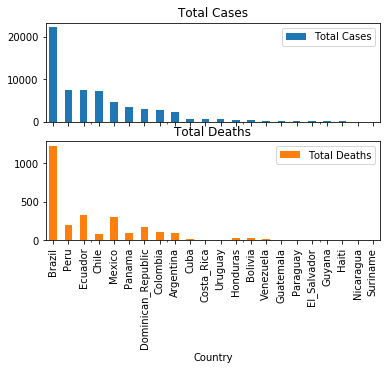

In [12]:
axes = LAT.plot.bar(rot=90, subplots=True)
# axes[1].legend(loc=2)
plt.show()

In [13]:
COL = df[df['countriesAndTerritories']=='Colombia']

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
2155,2020-04-13,13,4,2020,67,9,Colombia,CO,COL,49648685.0
2156,2020-04-12,12,4,2020,236,20,Colombia,CO,COL,49648685.0
2157,2020-04-11,11,4,2020,250,11,Colombia,CO,COL,49648685.0
2158,2020-04-10,10,4,2020,169,14,Colombia,CO,COL,49648685.0
2159,2020-04-09,9,4,2020,274,5,Colombia,CO,COL,49648685.0
2160,2020-04-08,8,4,2020,201,4,Colombia,CO,COL,49648685.0
2161,2020-04-07,7,4,2020,94,11,Colombia,CO,COL,49648685.0
2162,2020-04-06,6,4,2020,79,3,Colombia,CO,COL,49648685.0
2163,2020-04-05,5,4,2020,139,7,Colombia,CO,COL,49648685.0
2164,2020-04-04,4,4,2020,106,6,Colombia,CO,COL,49648685.0


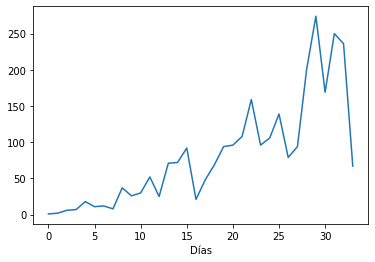

In [14]:
def cases_counter(df):
    cs = list(df['cases'])[::-1]
    return cs

plt.plot(cases_counter(COL))
plt.xlabel("Días")
plt.show()

In [15]:
def acc_list(old):
    new = list() 
    acc = 0
    for i in old:
        acc +=i
        new.append(acc)
    return new

def cases_counter(df):
    cs = list(df['cases'])[::-1]
    return cs

In [17]:
acc = acc_list(cases_counter(COL))
acc_col = pd.DataFrame()
window_size=4
for i in range(len(acc)-window_size):
    K = np.array(acc[i:i+window_size+1])
    acc_col = acc_col.append(pd.DataFrame(K).T)

acc_col

,0,1,2,3,4
0,1,3,9,16,34
0,3,9,16,34,45
0,9,16,34,45,57
0,16,34,45,57,65
0,34,45,57,65,102
0,45,57,65,102,128
0,57,65,102,128,158
0,65,102,128,158,210
0,102,128,158,210,235
0,128,158,210,235,306


In [18]:
Y = acc_col.iloc[:,-1]
X = acc_col.iloc[:,:-1]